<a href="https://colab.research.google.com/github/mungaimoureen/Week-8-Hypothyroidism-Tests./blob/main/Moringa_School_Data_Science_Core_IP_Wk_8_Moureen_Mungai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nairobi Hospital hypothyroidism test**

##**Business understanding**

**1.1 Define the question**

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



**1.2 Metric for success**

Success will be known if we create a model that can predict upto 95% accuracy.

**1.3 Understanding the context**

This is a study conducted by a Data Scientist for Nairobi Hospital which previously conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Nairobi Hospital is interested in having a model that predicts whether a patient has hypothyroidism or not by studying their symptoms.

**1.4 Experimental design**

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.

5. Performing regression analysis.

6. Modelling

      Decision Trees: Random Forests , Ada Boosted Trees , Gradient Boosted Trees

      Support Vector Machines: Kernel = polynomial , linear , rbf

7. Challenge your solution by providing insights on how you can make improvements in model improvement.

### Loading Data

In [2]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Loading the dataset**

In [3]:
hypo = pd.read_csv('http://bit.ly/hypothyroid_data')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


**Exploring the dataset**

In [4]:
##Checking the shape

print("Our dataset has ", hypo.shape, '( 21613 rows and 20 columns )')



Our dataset has  (3163, 26) ( 21613 rows and 20 columns )


In [5]:
##Checking the columns

print(hypo.columns)

##Description of the dataset

print(hypo.describe())

##Checking the information of the dataset

print(hypo.info())

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')
          status   age   sex on_thyroxine query_on_thyroxine  \
count       3163  3163  3163         3163               3163   
unique         2    93     3            2                  2   
top     negative     ?     F            f                  f   
freq        3012   446  2182         2702               3108   

       on_antithyroid_medication thyroid_surgery query_hypothyroid  \
count                       3163            3163              3163   
unique                         2               2                 2   
top                            f               f                 f   
fr

# Data preparation



**Cleaning the data**

In [6]:
#Check for null values
hypo1 = hypo.replace(['?'], np.nan)
print(hypo1.isnull().sum())
print('***')
print('Our Data has no null values')

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64
***
Our Data has no null values


In [7]:
#We drop TBG column coz it has so many nulls and it wont have any effect on the data
hypo1 = hypo1.drop(['TBG'], axis =1)
print(hypo1.isnull().sum())

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64


In [8]:
#changing the column datatypes
# Changing the columns dtypes so that we can impute them


#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypo1.columns:
  if column in numerical_columns:
    hypo1[column]= pd.to_numeric(hypo1[column])
  
  else:
    hypo1[column] = hypo1[column].astype('category')
    
    
# checking the data types to confirm changes

hypo1.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
dtype: object

In [9]:
#replace the null values in the age column with the mean age


hypo1['age']= hypo1['age'].fillna(hypo1['age'].mean(), axis = 0)
print(hypo1.isnull().sum())

status                         0
age                            0
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64


In [10]:
#replace the null values in the sex column with the modal value
hypo2 = hypo1

hypo2['sex']= hypo2['sex'].fillna(hypo2['sex'].mode()[0], axis = 0)
print(hypo2.isnull().sum())

status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64


In [11]:
#The null values are in all the numerical column
#defining the array of numerical columns to use.
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']



#dropping the null values and assigning the resultant values to a new dataframe
hypo2[numerical_columns_2] = hypo2[numerical_columns_2].fillna(0)
hypo2[numerical_columns_2].head()
print(hypo2.isnull().sum())

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64


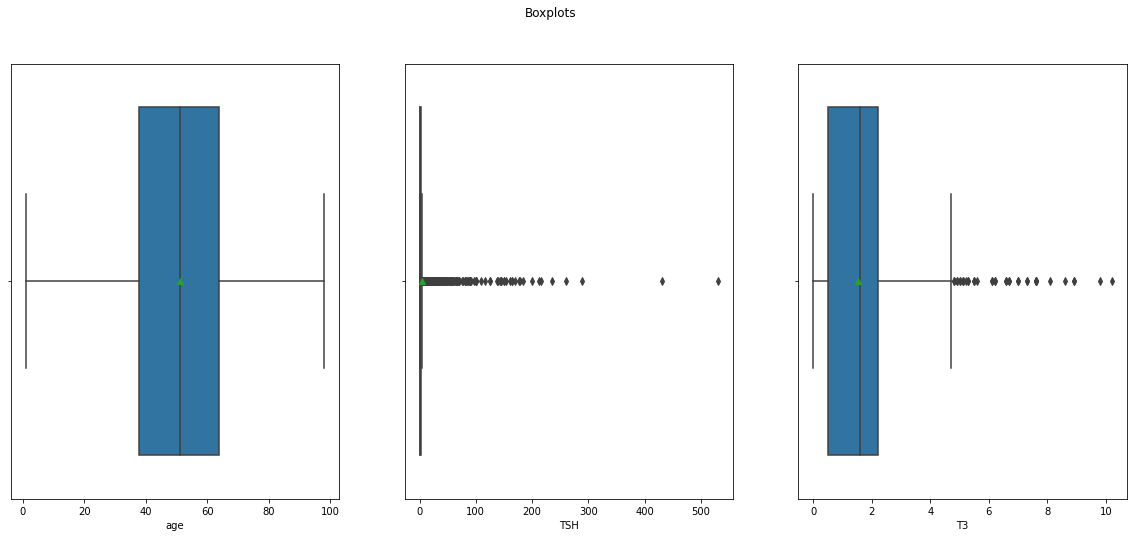

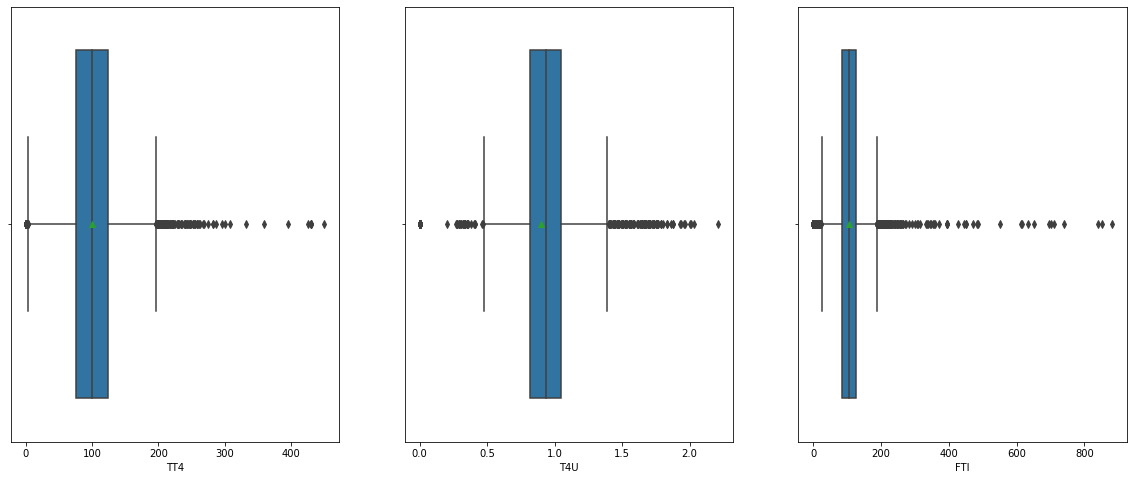

In [12]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = hypo2['age'], ax=ax1, showmeans = True)
sns.boxplot(x = hypo2['TSH'], ax=ax2, showmeans = True)
sns.boxplot(x = hypo2['T3'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 8))
sns.boxplot(x = hypo2['TT4'], ax=ax4, showmeans = True)
sns.boxplot(x = hypo2['T4U'], ax=ax5, showmeans = True)
sns.boxplot(x = hypo2['FTI'], ax=ax6, showmeans = True)

plt.show()

**Data Analysis**

**Univariate Analysis**

In [13]:
# Ploting the univariate summaries and recording our observations
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return out_df

uni_stats(hypo2)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
status,3163,0,2,negative,-,-,-,-,-,-,-,-,-
age,3163.0,0.0,93.0,51.154214,51.154214,1.0,38.0,51.154214,64.0,98.0,17.881969,-0.175276,-0.62562
sex,3163,0,2,F,-,-,-,-,-,-,-,-,-
on_thyroxine,3163,0,2,f,-,-,-,-,-,-,-,-,-
query_on_thyroxine,3163,0,2,f,-,-,-,-,-,-,-,-,-
on_antithyroid_medication,3163,0,2,f,-,-,-,-,-,-,-,-,-
thyroid_surgery,3163,0,2,f,-,-,-,-,-,-,-,-,-
query_hypothyroid,3163,0,2,f,-,-,-,-,-,-,-,-,-
query_hyperthyroid,3163,0,2,f,-,-,-,-,-,-,-,-,-
pregnant,3163,0,2,f,-,-,-,-,-,-,-,-,-




>Here we can clearly see the summaries of our continous variables.



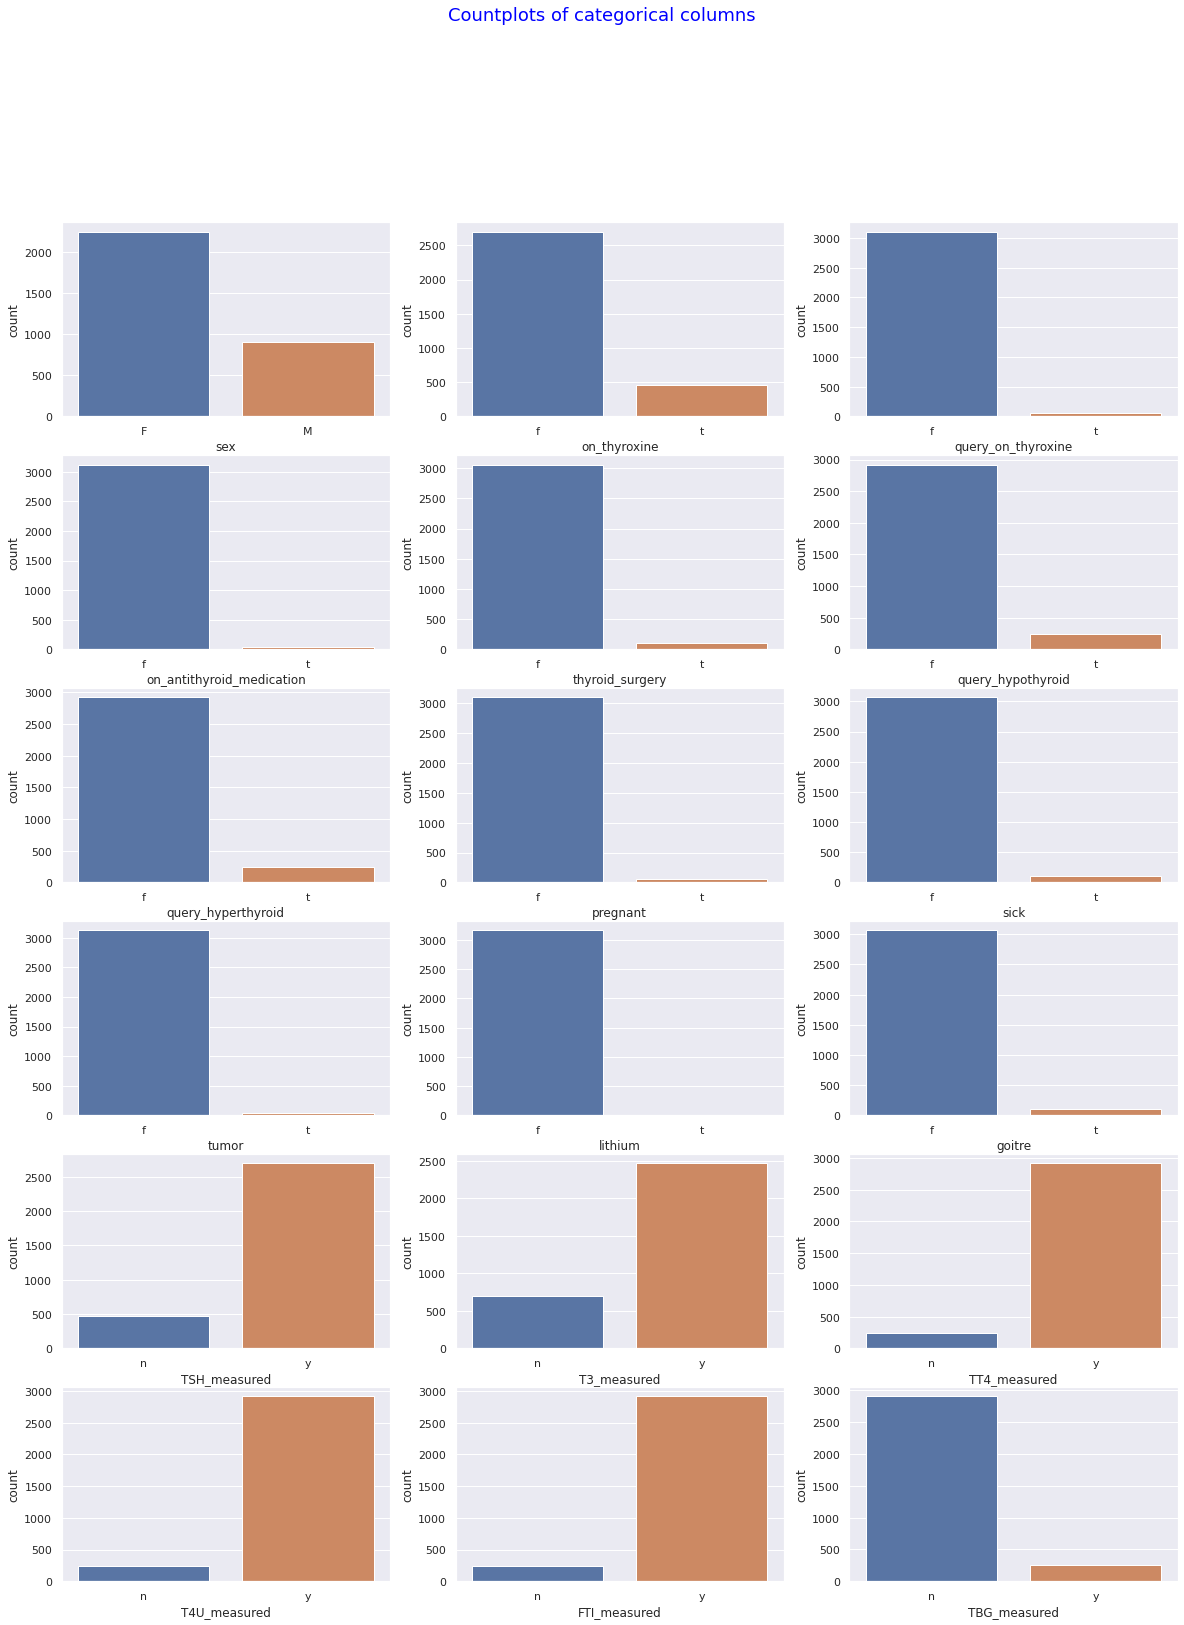

In [14]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sns.set(style = 'darkgrid', context = 'notebook')
corr = hypo2.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), hypo2, categorical_columns_1):
   sns.countplot(hypo2[column], ax=ax)



> Here we clearly see each categorical variable and its univariate analysis.



**Bivariate Analysis**

<Figure size 432x288 with 0 Axes>

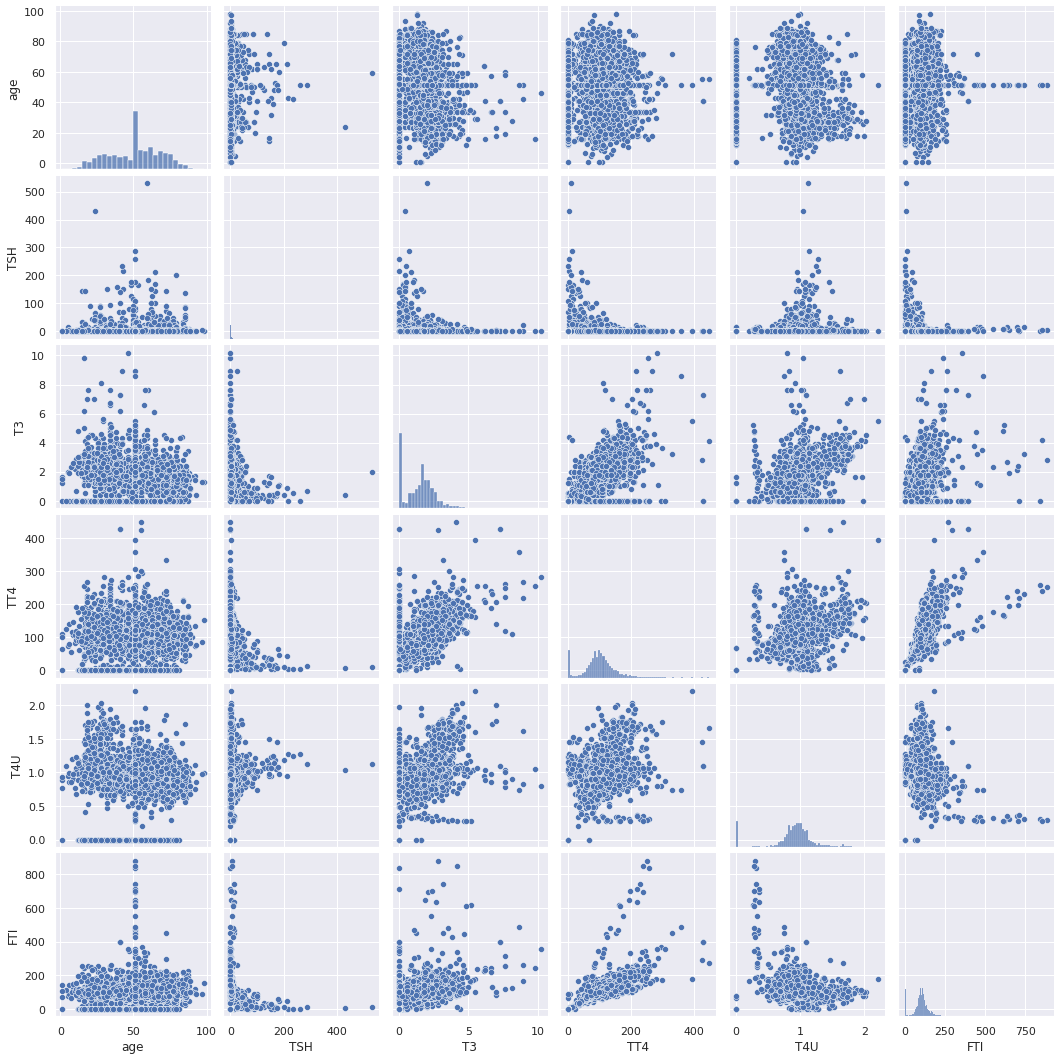

In [15]:
#Lets look at the pair plots

# Plot the pairplot
plt.figure()
sns.pairplot(hypo2)
plt.show()



> Here we compare how two variables relate when they are analysed against each other. We can clearly see the relationships in the graphs



In [16]:
#Correlations
hypo2.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.011725,-0.079260,-0.005226,-0.028418,0.072473
TSH,0.011725,1.000000,-0.085072,-0.220293,0.095537,-0.186038
T3,-0.079260,-0.085072,1.000000,0.502813,0.457418,0.336268
TT4,-0.005226,-0.220293,0.502813,1.000000,0.599128,0.763978
T4U,-0.028418,0.095537,0.457418,0.599128,1.000000,0.204452
FTI,0.072473,-0.186038,0.336268,0.763978,0.204452,1.000000


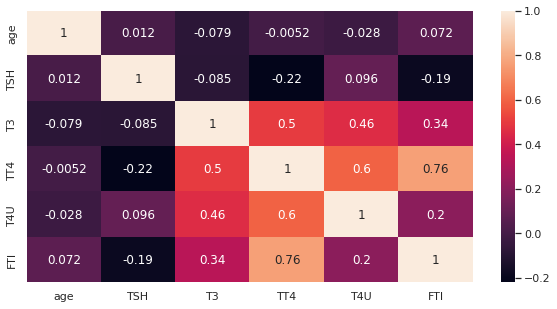

In [17]:
#correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(hypo2.corr(),annot=True)
plt.show()

**PCA**

In [18]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = hypo2.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,on_thyroxine
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,T3
9,PC9,TT4


The dataframe above shows 10 features that explain the most variance in the data.

##**Modeling**

In [19]:
#Encoding using label encoder
from sklearn.preprocessing import LabelEncoder

hypo_fin = hypo2.apply(LabelEncoder().fit_transform)
hypo_fin .head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,70,1,0,0,0,0,0,0,0,...,165,1,7,1,23,1,116,1,19,0
1,0,12,0,1,0,0,0,0,0,0,...,221,1,18,1,27,1,81,1,26,0
2,0,21,1,0,0,0,0,0,0,0,...,0,1,3,1,6,1,68,1,0,0
3,0,21,0,0,0,0,0,0,0,0,...,237,1,5,1,9,1,72,1,9,0
4,0,75,1,0,0,0,0,0,0,0,...,106,1,13,1,64,1,96,1,48,0


In [20]:
#changing the column datatypes
# Changing the columns dtypes so that we can impute them


#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypo_fin.columns:
  if column in numerical_columns:
    hypo_fin[column]= pd.to_numeric(hypo_fin[column])
  
  else:
    hypo_fin[column] = hypo_fin[column].astype('category')
    
    
# checking the data types to confirm changes

hypo_fin.dtypes

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                             int64
T3_measured                  category
T3                              int64
TT4_measured                 category
TT4                             int64
T4U_measured                 category
T4U                             int64
FTI_measured                 category
FTI                             int64
TBG_measured                 category
dtype: object

## **Decision Trees**

**Random forests**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = hypo_fin.status.cat.codes

# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
2531,1,1
1728,1,1
1266,1,1
1880,1,1
3059,1,1


In [23]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))


R2 score : 0.55
accuracy_score: 0.982086406743941
F1_score, average = micro: 0.982086406743941
F1_score, average = macro: 0.8721642459251512
F1_score, average = weighted: 0.9809622028264762


In [24]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.01791359325605901
Mean Squared Error: 0.01791359325605901
Root Mean Squared Error: 0.1338416723448232


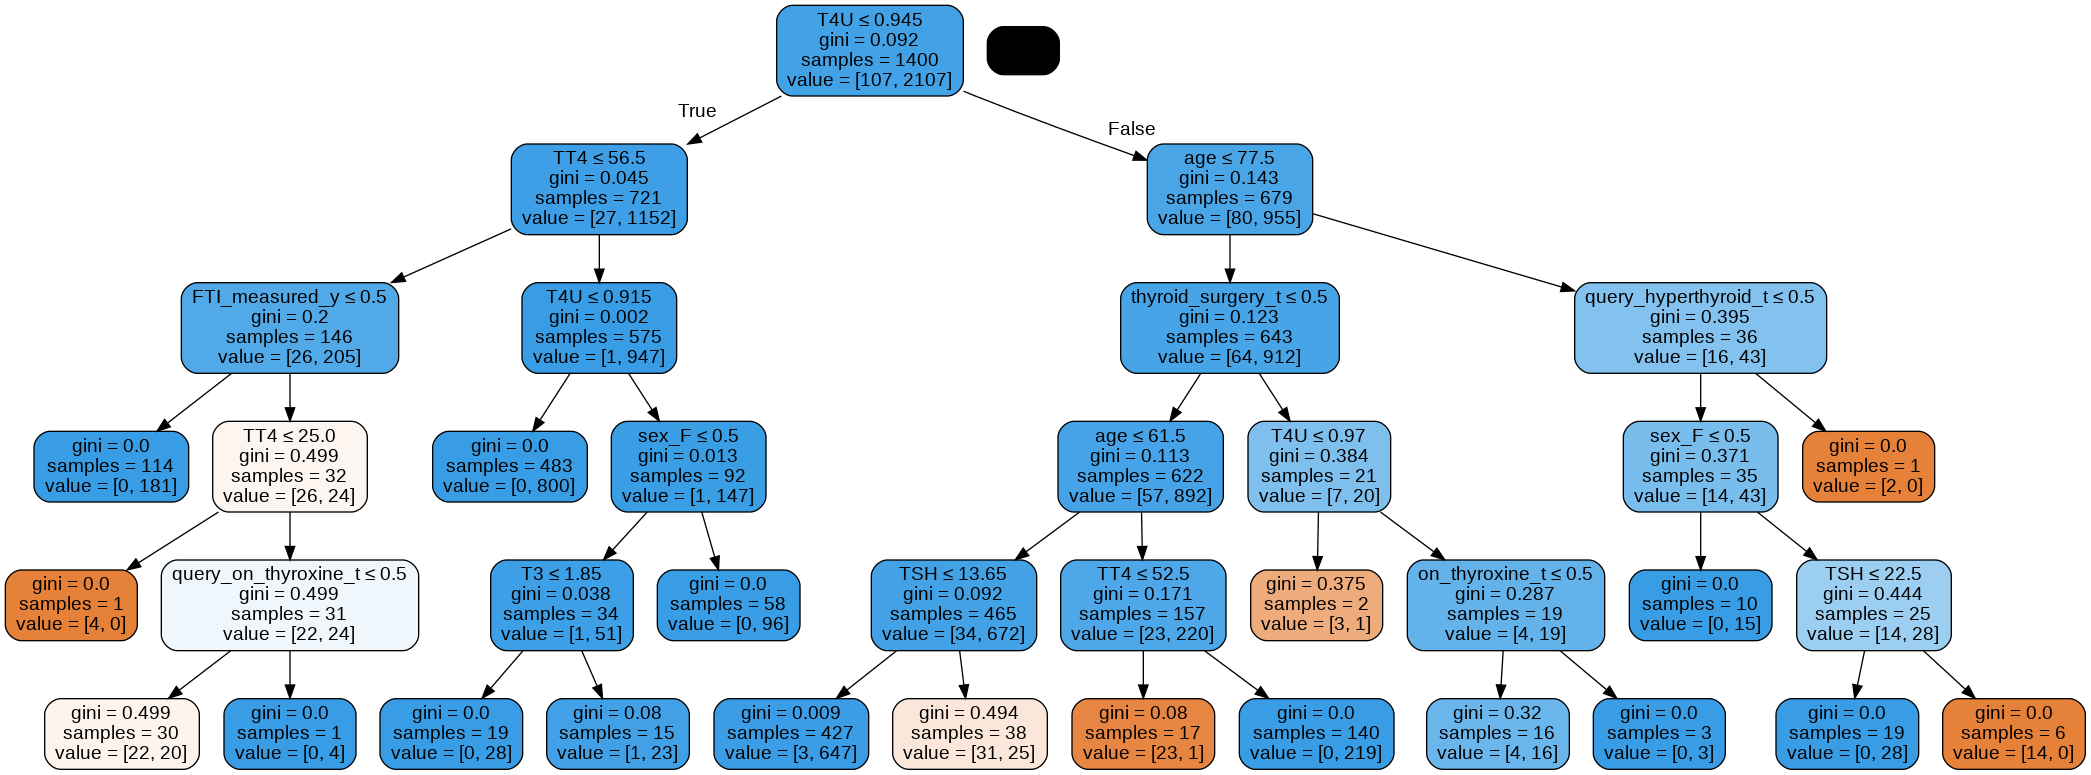

In [25]:
#Visualizing tree number 
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

**ADA boosted trees**

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy_score(y_test, y_pred_ada)

0.9894625922023182

In [27]:
print('F1_score, average = micro:',f1_score(y_test, y_pred_ada, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_ada, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_ada, average='weighted'))

F1_score, average = micro: 0.9894625922023182
F1_score, average = macro: 0.9331501831501832
F1_score, average = weighted: 0.9894625922023182


**gradient boosted trees**

In [28]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.958904109589041

In [29]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))

print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))
print('F1_score, average = micro:',f1_score(y_test, y_pred_gbc, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbc, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbc, average='weighted'))

R2 score : -0.04
accuracy_score: 0.958904109589041
F1_score, average = micro: 0.958904109589041
F1_score, average = macro: 0.48951048951048953
F1_score, average = weighted: 0.9387872401571032


**kernel  polynomial**

In [30]:
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

0.958904109589041

In [31]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred, average='weighted'))

F1_score, average = micro: 0.958904109589041
F1_score, average = macro: 0.48951048951048953
F1_score, average = weighted: 0.9387872401571032


**kernel linear**

In [32]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9778714436248683

In [33]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred1, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred1, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred1, average='weighted'))

F1_score, average = micro: 0.9778714436248683
F1_score, average = macro: 0.854240263302249
F1_score, average = weighted: 0.9774470803056832


**kernel RBF**

In [34]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9620653319283456

In [35]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred2, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred2, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred2, average='weighted'))

F1_score, average = micro: 0.9620653319283456
F1_score, average = macro: 0.5617302955665024
F1_score, average = weighted: 0.9461755179161887


**Challenging the Solution**

In [36]:
# The most important features
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances
#the list below shows the most important features in the data and the value of how important they are.


# the most important feature is TSH and it accounts for 36% importance

[('TSH', 0.36),
 ('TT4', 0.34),
 ('FTI_measured_y', 0.15),
 ('age', 0.04),
 ('T4U', 0.04),
 ('sex_F', 0.02),
 ('thyroid_surgery_t', 0.02),
 ('query_hyperthyroid_t', 0.02),
 ('query_on_thyroxine_t', 0.01),
 ('T3', 0.0),
 ('FTI', 0.0),
 ('sex_M', 0.0),
 ('on_thyroxine_f', 0.0),
 ('on_thyroxine_t', 0.0),
 ('query_on_thyroxine_f', 0.0),
 ('on_antithyroid_medication_f', 0.0),
 ('on_antithyroid_medication_t', 0.0),
 ('thyroid_surgery_f', 0.0),
 ('query_hypothyroid_f', 0.0),
 ('query_hypothyroid_t', 0.0),
 ('query_hyperthyroid_f', 0.0),
 ('pregnant_f', 0.0),
 ('pregnant_t', 0.0),
 ('sick_f', 0.0),
 ('sick_t', 0.0),
 ('tumor_f', 0.0),
 ('tumor_t', 0.0),
 ('lithium_f', 0.0),
 ('lithium_t', 0.0),
 ('goitre_f', 0.0),
 ('goitre_t', 0.0),
 ('TSH_measured_n', 0.0),
 ('TSH_measured_y', 0.0),
 ('T3_measured_n', 0.0),
 ('T3_measured_y', 0.0),
 ('TT4_measured_n', 0.0),
 ('TT4_measured_y', 0.0),
 ('T4U_measured_n', 0.0),
 ('T4U_measured_y', 0.0),
 ('FTI_measured_n', 0.0),
 ('TBG_measured_n', 0.0),
 ('TBG

In [37]:
#creating a new set of independent variables based on their importance
X1 = pd.get_dummies(hypo2)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.958904109589041

With 12 of the best features we have an accuracy score of 95.9%.

##**Evaluation**

The model succeded giving s accurate predictions of 95%.